C:\Users\User\Documents\Homework\ExcelSheets
Filename.fileTypewagesmicrodata.xlsx
SheetnameData
Empty DataFrame
Columns: [ID, WAGE, OCCUPATION, SECTOR, UNION, EDUCATION, EXPERIENCE, AGE, SEX, MARR, RACE, SOUTH]
Index: []
Independant variableWAGE
Dependant variable: 1AGE
Dependant variable: 2EDUCATION
Dependant variable: 3

Regression Coefficients:
[[-5.53423152]
 [ 0.10502787]
 [ 0.82110709]]


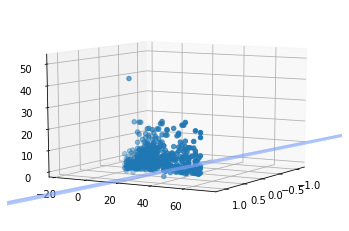

In [48]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import os
import seaborn as sns
import scipy.optimize as scpo
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

os.chdir("C:/Users/User/Documents/Homework/ExcelSheets")
cwd = os.getcwd()
print(cwd)
file = input('Filename.fileType')
sheet = input('Sheetname')
df = pd.read_excel(str(file),str(sheet), na_filter=False)
wb = load_workbook(str(file), data_only=True)
sht = wb[str(sheet)]
print(df.head(n=0))

Independant = input('Independant variable')
indep = df[str(Independant)]
x = header = []
var = [[]]
for i in range(len(indep)):
    if isinstance(indep[i],str)==True:
        x.append(i+1)
for j in range(sht.max_column-1):
    inp = input('Dependant variable: '+str(j+1))
    if inp == '':
        break
    str_check = df[str(inp)]
    n = j
    for i in range(len(str_check)):
        if isinstance(str_check[i],str)==True and (i+1) not in x:
            x.append(i+1)
    df = pd.read_excel(str(file),str(sheet), skiprows=x)
    var[0] = pd.Series(np.ones(len(df[str(inp)])))
    var.append(df[str(inp)])
    header.append(str(inp))
indep = df[str(Independant)]

m = n + 2
mat = np.zeros((m,m))
vec = np.zeros((m,1))
sum_x = sum_y = 0
for k in range(n+2): 
    for j in range(n+2):
        for i in range(len(var[j])):
            sum_x += var[j][i]*var[k][i]
            if j == 0:
                sum_y += indep[i]*var[k][i]
        mat[k,j] = sum_x
        sum_x = 0
    vec[k,0] = sum_y
    sum_y = 0
    
regr_coeff = np.linalg.solve(mat,vec)
print()
print('Regression Coefficients:')
print(regr_coeff)

if len(regr_coeff) == 2:
    
    def Line(gradient, intercept, x):
        return gradient*x + intercept
    
    xerrors = 0
    yerrors = 0
    parameters, errors = scpo.curve_fit(Line,var[1],indep) 
    fit_intercept = parameters[0]
    fit_gradient = parameters[1] 
    lobf = Line(fit_gradient, fit_intercept, var[1])
    
    Residuals = indep - Line(fit_gradient, fit_intercept, var[1])
    Dependent_Variable, Dependent_Units = str(header[0]), ""
    Independent_Variable, Independent_Units = str(Independant), ""
    
    fig1 = plt.figure(1)
    #(left_position,bottom_position,frac_width,frac_height) for add_axes
    main_plot_frame = fig1.add_axes((0,0,1.0,0.9))
    plt.errorbar(var[1], indep, xerr=xerrors, yerr=yerrors, fmt = 'k.', linewidth=0.5, dash_capstyle='butt')
    plt.ylabel(Independent_Variable + " / " + Independent_Units)
    plt.plot(var[1], lobf , color = 'red', label="Best Fit Line") 
    ax=plt.gca()
    ax.legend(['Best-fit line'],loc=2); # upper left corner
    plt.title(str(Independant)+' against '+str(header[0]))
    residual_plot_frame = fig1.add_axes((0,-0.4,1.0,0.3))
    plt.scatter(var[1], Residuals, c="k", marker = '.')
    plt.plot(var[1], np.zeros(len(var[1])), 'r--')
    plt.xlabel(Dependent_Variable + " / " + Dependent_Units)
    plt.ylabel("Residuals")
    plt.ylim(-1.2*max(np.absolute(Residuals)),1.2*max(np.absolute(Residuals)))
    
    hitrogram_frame = fig1.add_axes((1.0,-0.4,0.2,0.3))
    plt.gca().axes.get_yaxis().set_ticks([])
    plt.hist(Residuals, bins = np.linspace(-1.2*max(np.absolute(Residuals)),1.2*max(np.absolute(Residuals)),20), 
             orientation = "horizontal", histtype='bar', density=True)
    plt.xlabel("Freq. Dens.")
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(var[1],indep)
    print('r^2 value '+str(r_value**2))
    if r_value > 0:
        if r_value**2 < 0.5:
            print('Poor positive correlation')
        if r_value**2 > 0.5:
            print('Good positive correlation')
    if r_value < 0:
        if r_value**2 > 0.5:
            print('Good negative correlation')
        else:
            print('Poor negative correlation')

if len(regr_coeff) != 2 and len(regr_coeff) != 3:
    print()
    print('No visualisation available')

## -- not yet working correctly:
def threeDim_equation(x1,x2):
    y = regr_coeff[2]*x1 + regr_coeff[1]*x2 + regr_coeff[0] 
    return y;
if len(regr_coeff) == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x[0] = np.linspace(min(var[1]),max(var[1]),100)
    x[1] = np.linspace(min(var[2]),max(var[2]),100)
    x[0],x[1] = np.meshgrid(x[0],x[1])
    ax.plot_surface(x[0],x[1],threeDim_equation(x[0],x[1]),cmap=cm.coolwarm)
    ax.scatter(var[0],var[1],indep)
    ax.set_xlim(-1.2*min(var[0]),1.2*max(var[0]))
    ax.set_ylim(-1.2*min(var[1]),1.2*max(var[1]))
    ax.set_zlim(-1.2*min(indep),1.2*max(indep))
    ax.view_init(azim=30, elev=10)
    plt.show()